## Market segmentation analysis

## Step 1: Deciding (not) to Segment
<br> McDonald’s can take the position that it caters to the entire market and that
there is no need to understand systematic differences across market segments.
Alternatively, McDonald’s can take the position that, despite their market power,
there is value in investigating systematic heterogeneity among consumers and
harvest these differences using a differentiated marketing strategy

## Step 2: Specifying the Ideal Target Segment
<br> McDonald’s management needs to decide which key features make a market segment attractive to them. In terms of knock-out criteria, the target segment or target
segments must be homogeneous (meaning that segment members are similar to one
another in a key characteristic), distinct (meaning that members of the segments
differ substantially from members of other segments in a key characteristic), large
enough to justify the development and implementation of a customised marketing
mix, matching the strengths of McDonald’s (meaning, for example, that they must
be open to eating at fast food restaurants rather than rejecting them outright),
identifiable (meaning that there must be some way of spotting them among other
consumers) and, finally, reachable (meaning that channels of communication and
distribution need to exist which make it possible to aim at members of the target
segment specifically)
<br>In terms of segment attractiveness criteria, the obvious choice would be a
segment that has a positive perception of McDonald’s, frequently eats out and likes
fast food. But McDonald’s management could also decide that they not only wish
to solidify their position in market segments in which they already hold high market
shares, but rather wish to learn more about market segments which are currently not
fond of McDonald’s; try to understand which perceptions are responsible for this;
and attempt to modify those very perceptions.

## Step 3: Collecting Data
<br> The data set contains responses from 1453 adult Australian consumers relating to
their perceptions of McDonald’s with respect to the following attributes: 
<br>YUMMY
<br>CONVENIENT 
<br>SPICY
<br>FATTENING
<br>GREASY
<br>FAST
<br>CHEAP
<br>TASTY
<br>EXPENSIVE,
<br>HEALTHY
<br>DISGUSTING
<br> Age
<br>Gemder

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

##  Data loading

In [2]:
data = pd.read_csv('mcdonalds.csv')
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
data.shape

(1453, 15)

In [4]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


## Step 4: Exploring data and data transformation

In [6]:
## since the first 11 features are in the form of categorical hacing two categories, we need to convert it in form of binary.
cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']
for ele in cat:
    for i in range(data.shape[0]):
        if data[ele].iloc[i] == 'Yes':
            data[ele].iloc[i] = 1
        else: 
            data[ele].iloc[i] = 0


C:\Users\Adarsh kumar\AppData\Local\Temp\ipykernel_10440\287543390.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[ele].iloc[i] = 0
C:\Users\Adarsh kumar\AppData\Local\Temp\ipykernel_10440\287543390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[ele].iloc[i] = 1


In [8]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [9]:
data['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [91]:
## removing the string part from the int part of the Like feature
data['Like'].replace(['I hate it!-5','I love it!+5'],[-5,+5],inplace =True)

In [11]:
data['Like'].value_counts()

+3    229
+2    187
0     169
+4    160
+1    152
-5    152
5     143
-3     73
-4     71
-2     59
-1     58
Name: Like, dtype: int64

In [12]:
def onehot(data,col):
    return pd.get_dummies(data[col],drop_first=True)

In [13]:
vis_freq = np.asarray(onehot(data,'VisitFrequency'))

In [14]:
gend = np.asarray(onehot(data,'Gender'))

In [15]:
# to remove scaling effect lets normalize the age and Like column
def normalize(data,col):
    from sklearn.preprocessing import MinMaxScaler
    scal = MinMaxScaler()
    return scal.fit_transform(data[col].values.reshape(-1,1))
like = np.asarray(normalize(data,'Like'))
age = np.asarray(normalize(data,'Age'))

In [16]:
data_11 = np.asarray(data[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']])
x_final = np.hstack((data_11,like,age,vis_freq,gend))

In [32]:
df =data[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']]

In [17]:
x_final.shape #data for model training

(1453, 19)

In [18]:
x_final[:10]

array([[0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0.19999999999999996,
        0.8113207547169812, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0.7, 0.6226415094339623, 0, 0,
        0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0.6, 0.8301886792452831, 0, 0,
        0, 0, 0, 0],
       [1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0.9, 0.9622641509433962, 0, 0,
        0, 1, 0, 0],
       [0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0.7, 0.5849056603773586, 0, 0,
        1, 0, 0, 1],
       [1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0.7, 0.6981132075471699, 0, 0,
        0, 0, 0, 1],
       [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0.7, 0.7169811320754718, 0, 0,
        0, 0, 0, 0],
       [1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1.0, 0.09433962264150941, 0, 0,
        0, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0.0, 0.7547169811320755, 0, 0,
        0, 0, 1, 1],
       [1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0.6, 0.2641509433962264, 0, 0,
        0, 0, 0, 0]], dtype=object)

In [19]:
data.mean()  

C:\Users\Adarsh kumar\AppData\Local\Temp\ipykernel_10440\2016512930.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


yummy          0.552650
convenient     0.907777
spicy          0.093599
fattening      0.867171
greasy         0.526497
fast           0.900206
cheap          0.598761
tasty          0.644184
expensive      0.357880
healthy        0.198899
disgusting     0.242946
Age           44.604955
dtype: float64

In [20]:
data.std()

C:\Users\Adarsh kumar\AppData\Local\Temp\ipykernel_10440\2723740006.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


yummy          0.497391
convenient     0.289440
spicy          0.291371
fattening      0.339506
greasy         0.499469
fast           0.299828
cheap          0.490318
tasty          0.478925
expensive      0.479542
healthy        0.399309
disgusting     0.429010
Age           14.221178
dtype: float64

##  Principal Component Analysis

This project is replica of macdonald case study which is done in r language and there they have choosen the first 11 features to perform principal component analysis.

In [21]:
from sklearn.decomposition import PCA
principal=PCA(n_components=5)
principal.fit(data_11)
x=principal.transform(data_11)
 

In [22]:
principal.components_

array([[-0.47693349, -0.15533159, -0.00635636,  0.11623168,  0.3044427 ,
        -0.10849325, -0.33718593, -0.47151394,  0.32904173, -0.21371062,
         0.37475293],
       [ 0.36378978,  0.016414  ,  0.01880869, -0.03409395, -0.06383884,
        -0.0869722 , -0.61063276,  0.3073178 ,  0.60128596,  0.07659344,
        -0.13965633],
       [-0.30444402, -0.0625153 , -0.03701866, -0.32235949, -0.80237317,
        -0.06464172, -0.14931026, -0.28726479,  0.02439661,  0.19205128,
        -0.08857138],
       [ 0.0551622 , -0.14242496,  0.19761927, -0.35413876,  0.2539601 ,
        -0.09736269,  0.11895823, -0.00254696,  0.06781599,  0.76348804,
         0.36953871],
       [-0.30753507,  0.27760805,  0.07062017, -0.07340475,  0.36139895,
         0.10793025, -0.12897259, -0.21089912, -0.00312457,  0.28784553,
        -0.72920859]])

Text(0, 0.5, 'pc2')

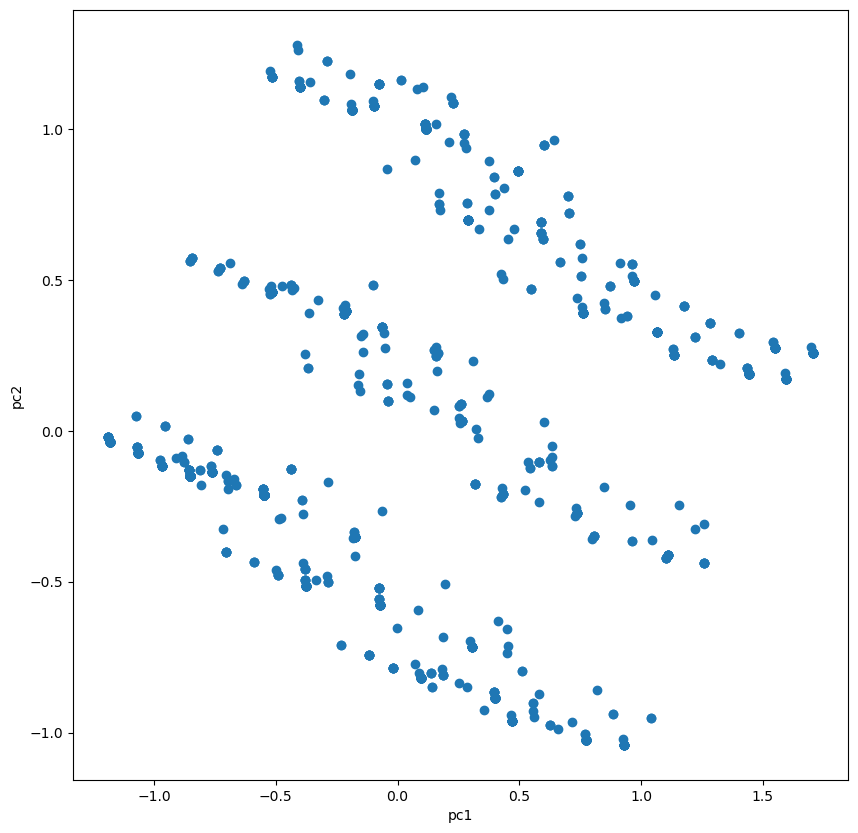

In [23]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],cmap='viridis')
plt.xlabel('pc1')
plt.ylabel('pc2')

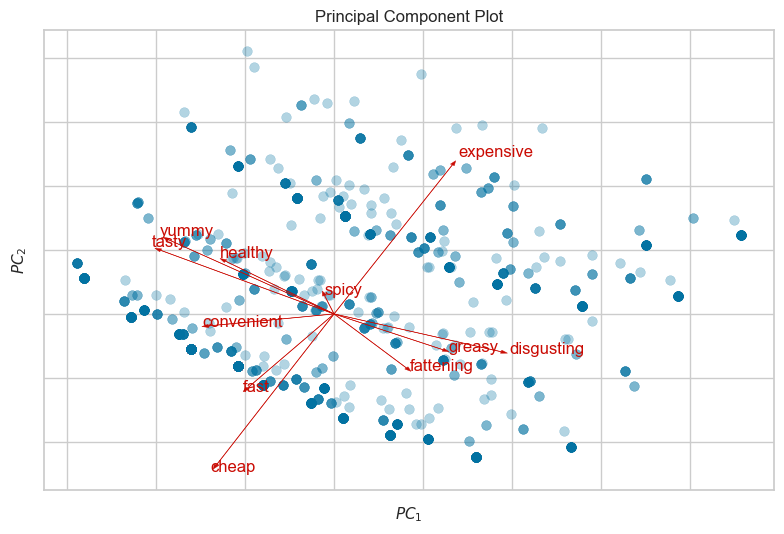

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [33]:
from yellowbrick.features.pca import PCADecomposition

visualizer = PCADecomposition(proj_features=True, alpha=0.3)
visualizer.fit_transform(df)
visualizer.show()

## Step-5: Extracting Segments

To illustrate a range of extraction techniques,
we subdivide this step into three sections. In the first section, we will use standard
k-means analysis. In the second section, we will use finite mixtures of binary
distributions. In the third section, we will use finite mixtures of regressions.

## 5.1 Using k-Means

For k_means used wcss (within cluster sum of square as evaluation metric for hyperparametere tuning). In this, section we

In [24]:
# using euclidean distance for k_means
def euclidean_distance(point1,point2):
    return np.sqrt(np.sum((point1-point2)**2))

In [25]:
# implementing within cluster sum of square 
def wcss(data,cluster_label,k_points,k):
    sum1 = 0
    for i  in range(k):
        for j in range(data.shape[0]):
            if cluster_label[j]==i:
                dis = euclidean_distance(k_points[i],data[j])
                sum1 += dis**2
    return sum1

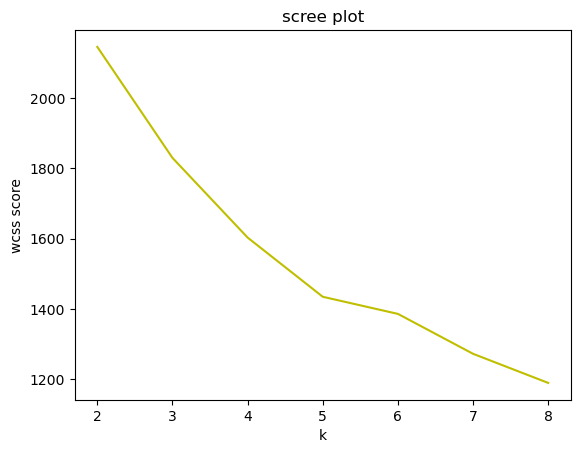

In [26]:
k = [i for i in range(2,9)]
wcss_scores = []
for ele in k:
    kmeans = KMeans(n_clusters=ele, random_state=0)
    kmeans.fit(data_11)
    cluster_label = kmeans.labels_
    k_center_points = kmeans.cluster_centers_
    wcss1 = wcss(data_11,cluster_label,k_center_points,ele)
    wcss_scores.append(wcss1)
plt.plot(k,wcss_scores,'y')
plt.xlabel('k')
plt.ylabel('wcss score')
plt.title('scree plot')
plt.show()
    

<AxesSubplot:>

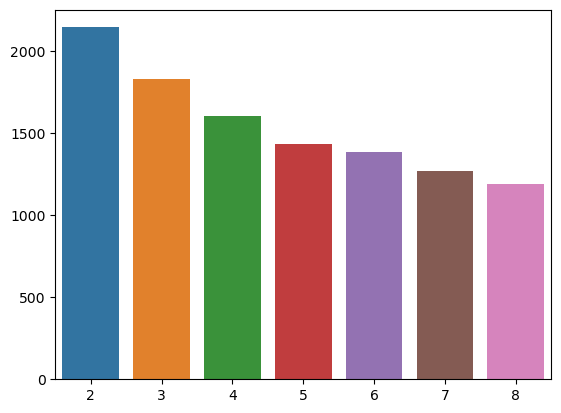

In [27]:
sns.barplot(x= k,y=wcss_scores)

In [56]:
### since global stability at 5 drops significantly so k = 4 will be the optimum solution.
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data_11)
cluster_label = kmeans.labels_
k_center_points = kmeans.cluster_centers_

In [57]:
data['cluster_no'] = kmeans.predict(data_11)

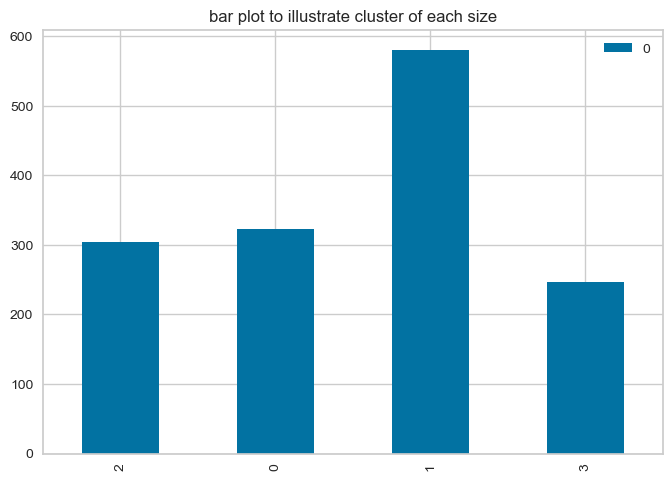

In [58]:
from collections import Counter
count = Counter(kmeans.labels_)
pd.DataFrame.from_dict(count, orient='index').plot.bar()
plt.title("bar plot to illustrate cluster of each size")
plt.show()

## Step 6: Profiling Segments

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


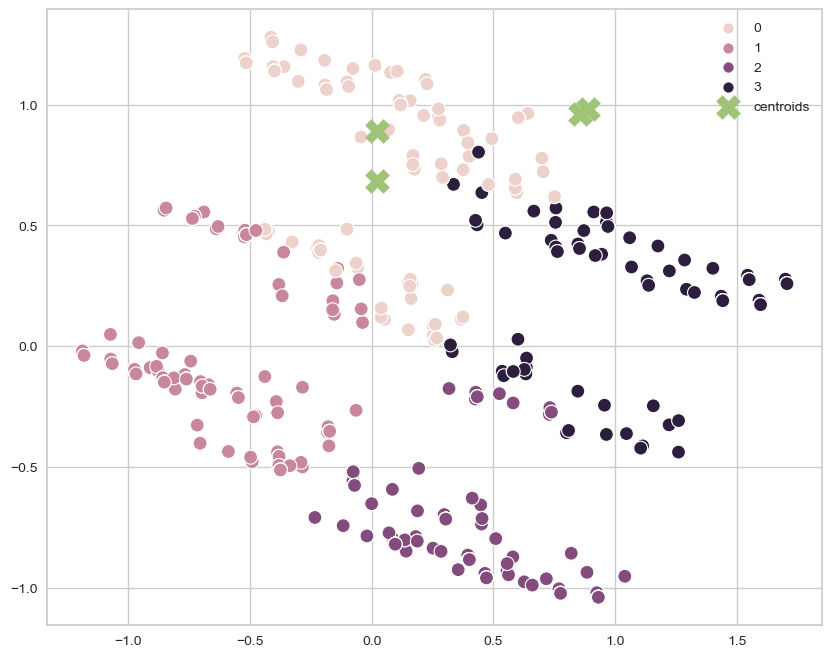

In [60]:
plt.figure(figsize=(10,8))
sns.scatterplot(x[:,0],x[:,1], hue=cluster_label, s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="g", s=300, label="centroids")
plt.legend()
plt.show()

## Step 7: Describing Segments

In [67]:
from statsmodels.graphics.mosaicplot import mosaic
crosstab =pd.crosstab(data['cluster_no'],data['Like'])
crosstab

Like,-5,5,+1,+2,+3,+4,-1,-2,-3,-4,0
cluster_no,,,,,,,,,,,
0,5,44,42,60,66,47,7,6,7,3,36
1,4,99,65,90,143,111,13,6,2,4,43
2,54,0,31,31,12,2,25,28,34,36,51
3,89,0,14,6,8,0,13,19,30,28,39


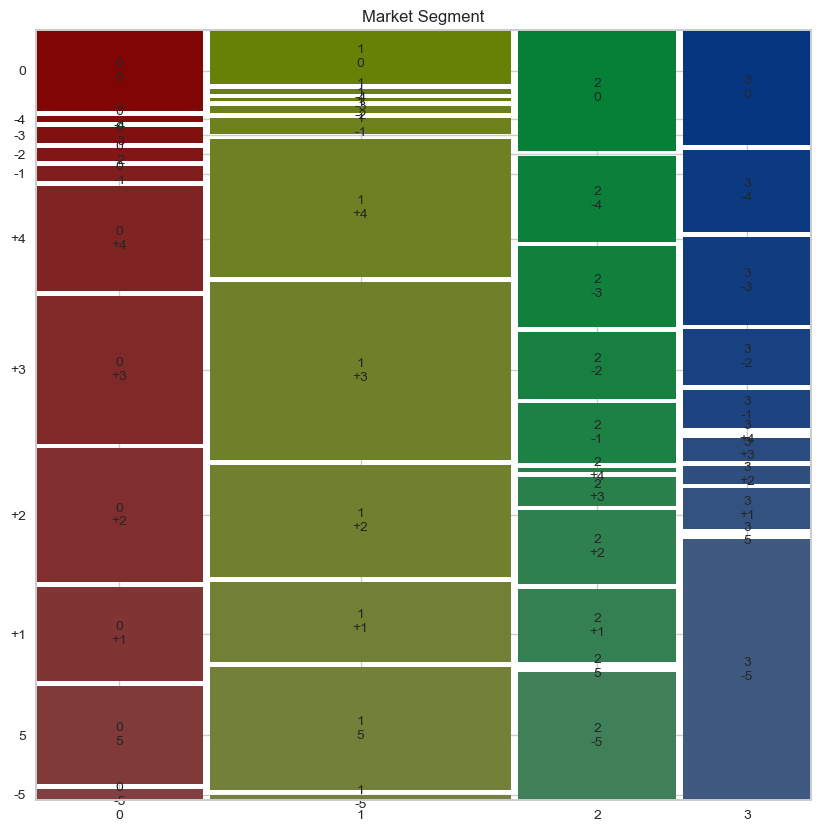

In [68]:
plt.rcParams['figure.figsize'] = (10,10)
mosaic(crosstab.stack(), gap=0.010, title="Market Segment")

plt.show()
     

Gender      Female  Male
cluster_no              
0              154   169
1              349   231
2              179   125
3              106   140


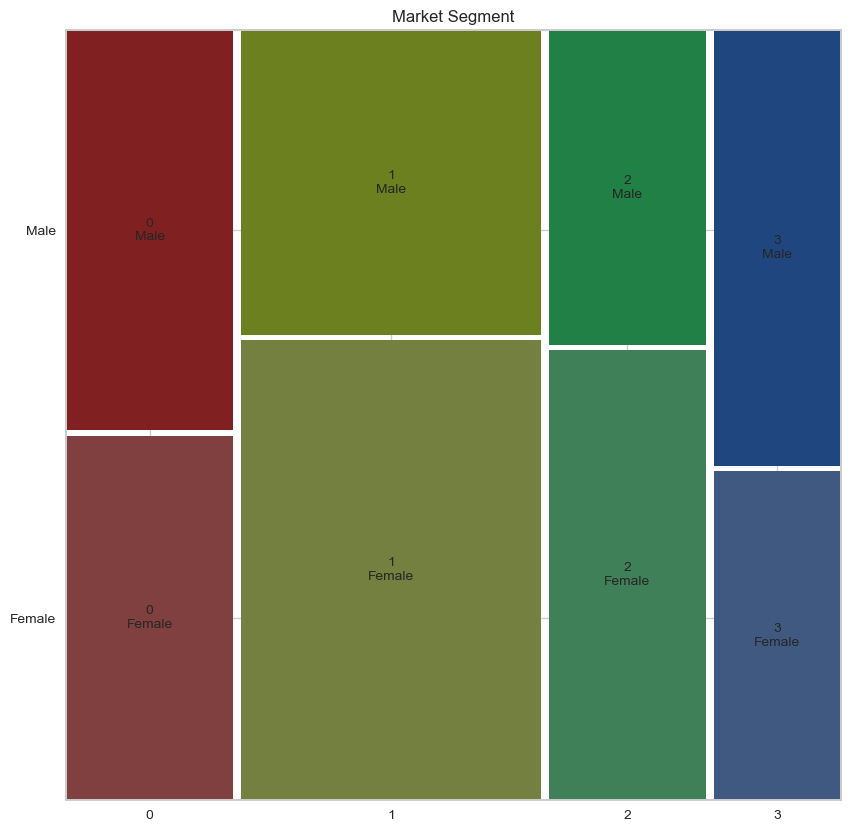

In [66]:
crosstab =pd.crosstab(data['cluster_no'],data['Gender'])
print(crosstab)
plt.rcParams['figure.figsize'] = (10,10)
mosaic(crosstab.stack(), gap=0.010, title="Market Segment")

plt.show()

<AxesSubplot:xlabel='cluster_no', ylabel='Age'>

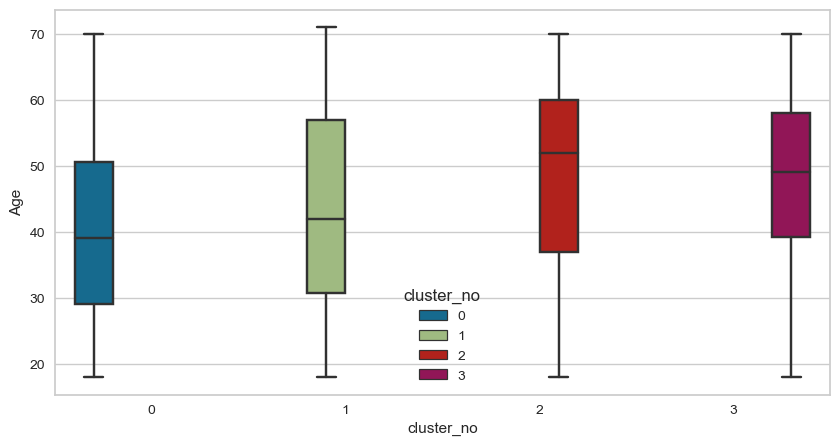

In [71]:
# boxplot for age
plt.figure(figsize=(10,5))
sns.boxplot(x=data['cluster_no'], y= data['Age'],hue= data['cluster_no'])

## Step 8: Selecting (the) Target Segment(s)

In [76]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_no
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,2
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,2


In [78]:
# compute the mean visiting frequency
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('cluster_no')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_no,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


<AxesSubplot:xlabel='cluster_no', ylabel='VisitFrequency'>

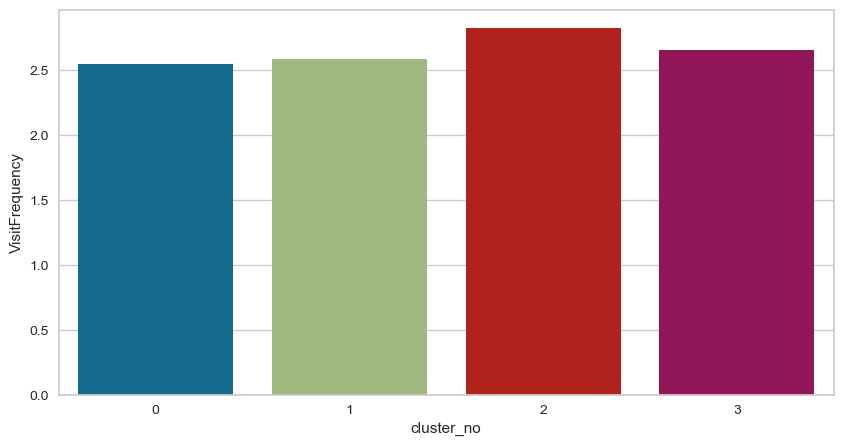

In [102]:
plt.figure(figsize=(10,5))
sns.barplot(x=visit['cluster_no'],y=visit['VisitFrequency'])

In [86]:
cluster

[0, 1, 2, 3]

In [99]:
data['Like'] = LabelEncoder().fit_transform(data['Like'].astype('int'))
like = data.groupby('cluster_no')['Like'].mean()
like = like.to_frame().reset_index()
like

,cluster_no,Like
0,0,7.139319
1,1,7.665517
2,2,3.486842
3,3,2.365854


<AxesSubplot:xlabel='cluster_no', ylabel='Like'>

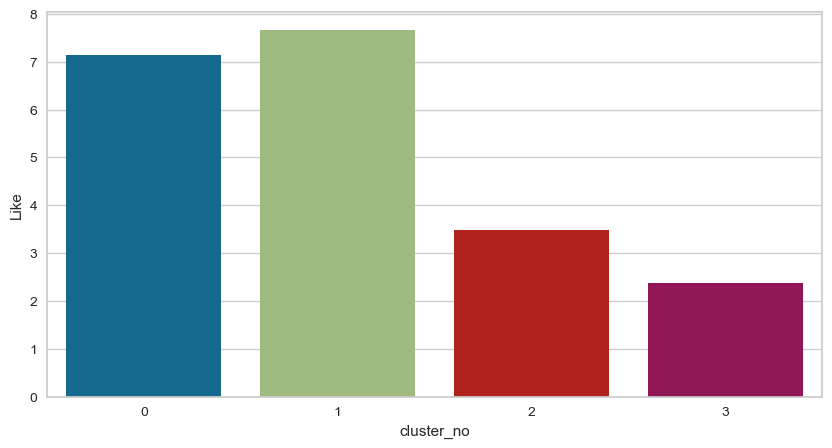

In [103]:
plt.figure(figsize=(10,5))
sns.barplot(x=like['cluster_no'],y=like['Like'])

In [106]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gen = data.groupby('cluster_no')['Gender'].mean()
Gen = Gen.to_frame().reset_index()
Gen

,cluster_no,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [107]:
final = Gen.merge(like, on = 'cluster_no',how='left').merge(visit,on='cluster_no',how ='left')
final

,cluster_no,Gender,Like,VisitFrequency
0,0,0.523220,7.139319,2.547988
1,1,0.398276,7.665517,2.584483
2,2,0.411184,3.486842,2.822368
3,3,0.569106,2.365854,2.654472


C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VisitFrequency', ylabel='Like'>

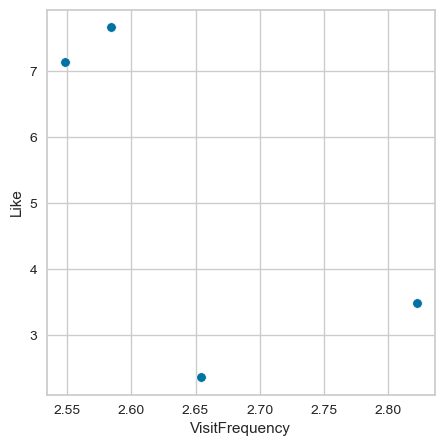

In [110]:
plt.figure(figsize=(5,5))
sns.scatterplot(final['VisitFrequency'],final['Like'])